In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

# Load the data
file_path = '/content/CensusAges.xlsx'
xls = pd.ExcelFile(file_path)



Saving CensusAges.xlsx to CensusAges.xlsx


<ipython-input-36-d12e52c4f3f3>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_grouped['Age_Range'] = pd.to_numeric(df_grouped['Age_Group'], errors='coerce')


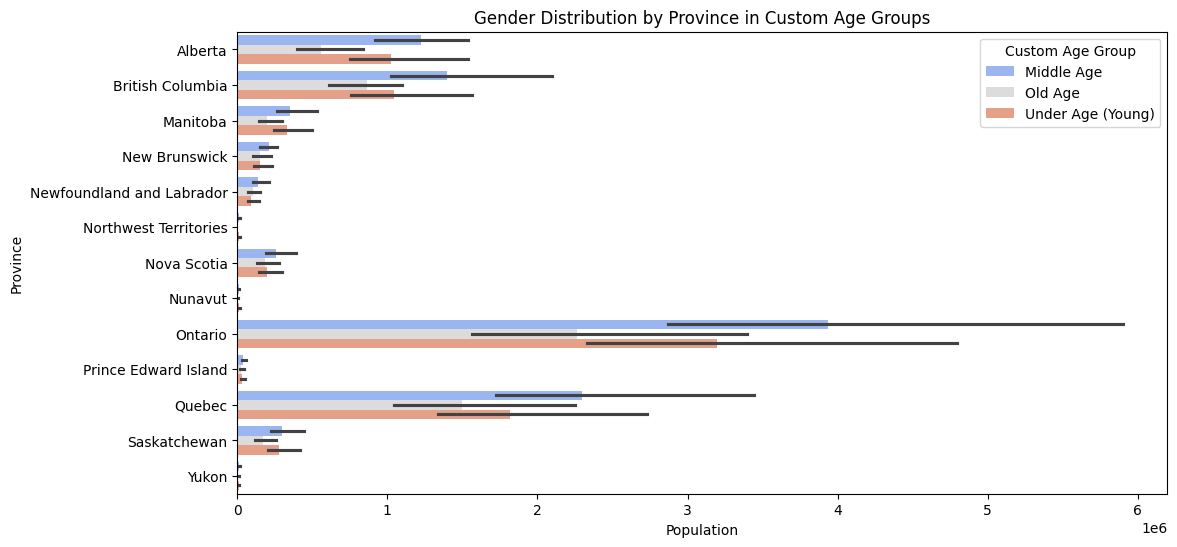

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the custom age group function based on the specified age ranges
def age_group_custom(age):
    if age >= 0 and age <= 29:
        return 'Under Age (Young)'
    elif age >= 30 and age <= 60:
        return 'Middle Age'
    elif age >= 61:
        return 'Old Age'
    else:
        return None  # For any negative age values or unexpected cases

# Convert Age_Group to numeric, handling both strings and integers
df_grouped['Age_Range'] = pd.to_numeric(df_grouped['Age_Group'], errors='coerce')

# Remove rows with invalid ages (negative or NaN)
df_grouped = df_grouped[df_grouped['Age_Range'] >= 0]

# Exclude Canada from the dataset
df_grouped = df_grouped[df_grouped['Province'] != 'Canada']

# Apply the custom age group function
df_grouped['Custom_Age_Group'] = df_grouped['Age_Range'].apply(age_group_custom)

# Now group the data by custom age ranges and continue with your analysis
gender_population_custom_age = df_grouped.groupby(['Province', 'Gender', 'Custom_Age_Group']).sum(numeric_only=True).reset_index()

# Plot the gender distribution across custom age ranges and provinces
plt.figure(figsize=(12, 6))
sns.barplot(x='Population', y='Province', hue='Custom_Age_Group', data=gender_population_custom_age, palette='coolwarm')
plt.title('Gender Distribution by Province in Custom Age Groups')
plt.xlabel('Population')
plt.ylabel('Province')
plt.legend(title='Custom Age Group')
plt.show()


<ipython-input-37-f70395b8d237>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Population', y='Custom_Age_Group', data=custom_age_group_population, palette='coolwarm')


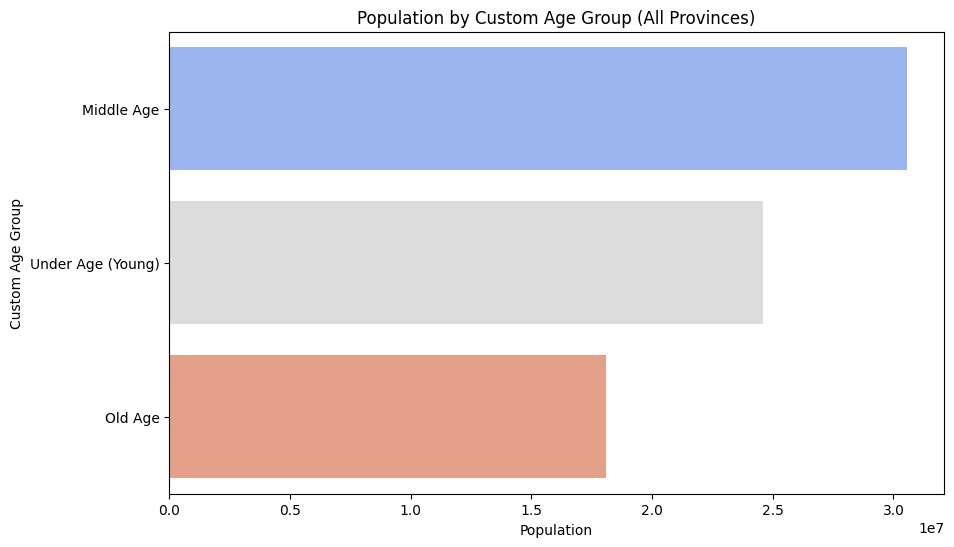

<ipython-input-37-f70395b8d237>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Population', y='Province', data=province_population, palette='viridis')


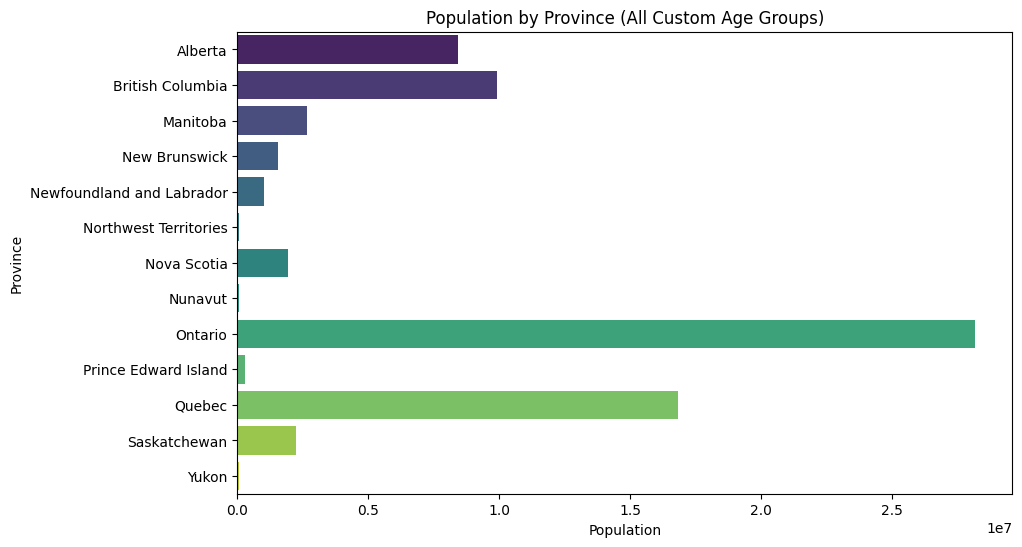

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up a basic EDA to visualize population distribution by Custom Age Group and Province

# Aggregate total population by Custom Age Group for all provinces and genders
custom_age_group_population = df_grouped.groupby('Custom_Age_Group')['Population'].sum().reset_index()

# Sort Custom Age Groups by population size
custom_age_group_population = custom_age_group_population.sort_values(by='Population', ascending=False)

# Plot: Custom Age Group Distribution
plt.figure(figsize=(10, 6))
sns.barplot(x='Population', y='Custom_Age_Group', data=custom_age_group_population, palette='coolwarm')
plt.title('Population by Custom Age Group (All Provinces)')
plt.xlabel('Population')
plt.ylabel('Custom Age Group')
plt.show()

# Aggregate total population by Province
province_population = df_grouped.groupby('Province')['Population'].sum().reset_index()

# Plot: Population by Province
plt.figure(figsize=(10, 6))
sns.barplot(x='Population', y='Province', data=province_population, palette='viridis')
plt.title('Population by Province (All Custom Age Groups)')
plt.xlabel('Population')
plt.ylabel('Province')
plt.show()


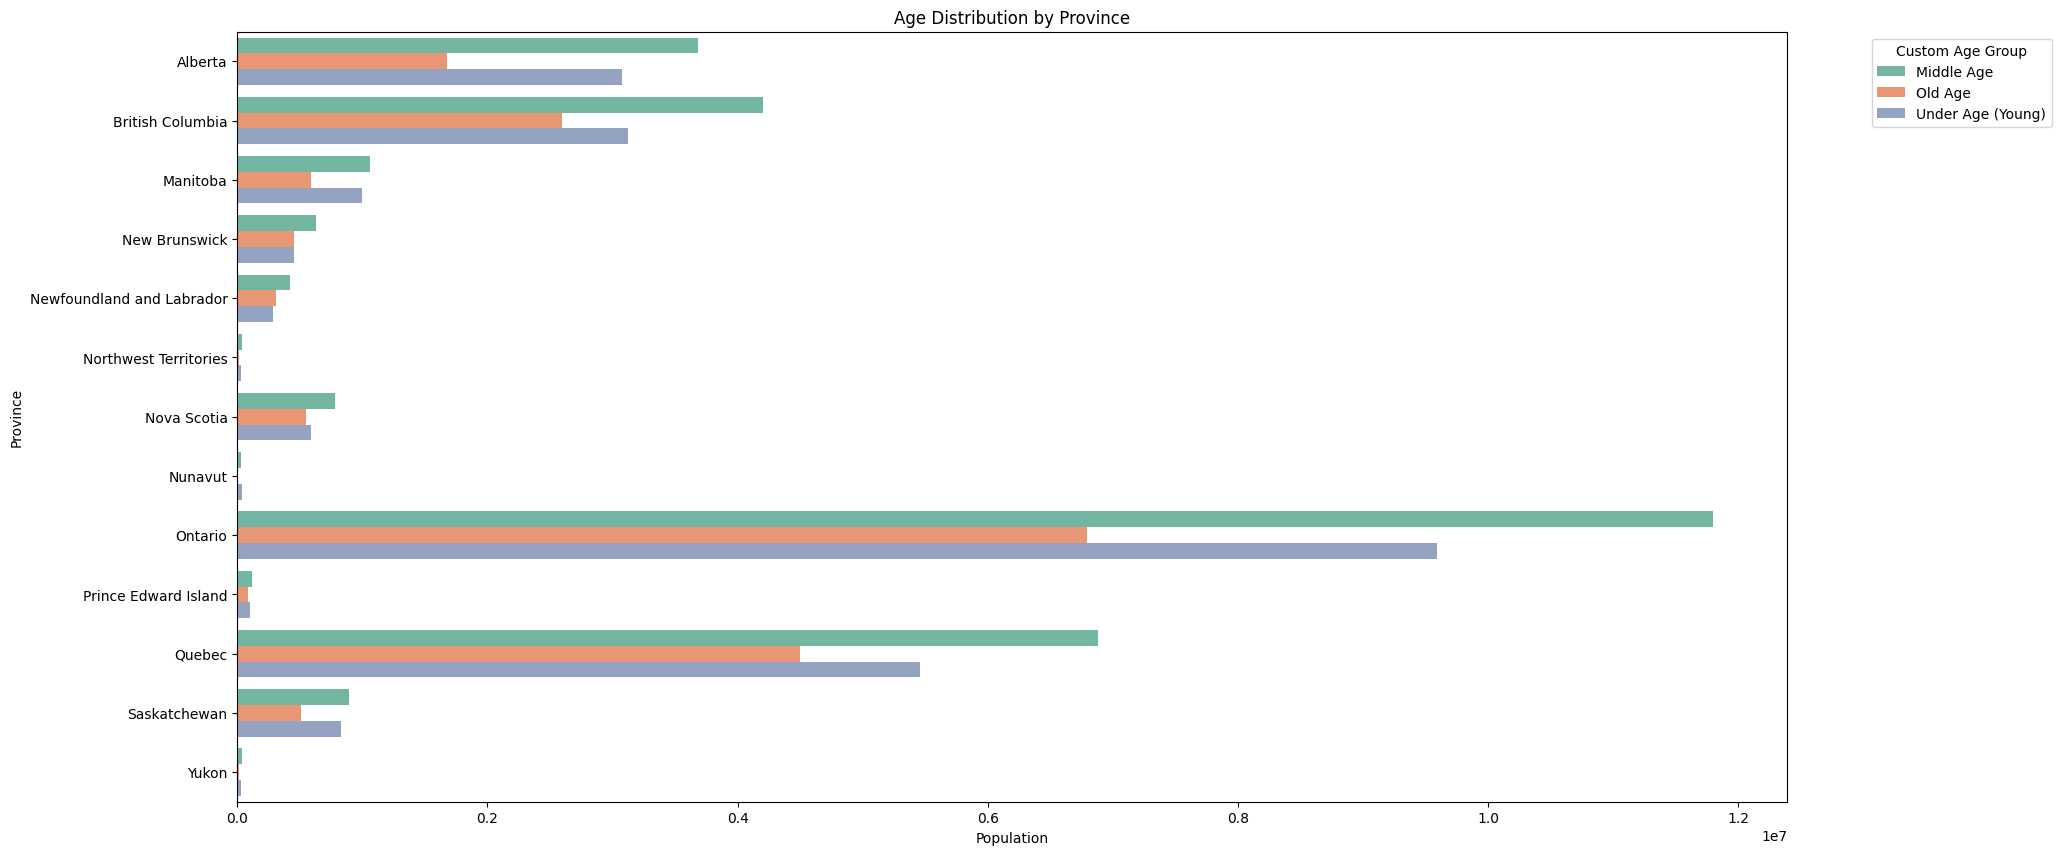

In [ ]:
# Ensure Population is numeric
df_grouped['Population'] = pd.to_numeric(df_grouped['Population'], errors='coerce')

# Check for any NaN values that may result from the conversion
if df_grouped['Population'].isnull().any():
    print("Warning: There are NaN values in the Population column after conversion.")
    # Optionally, you can drop these rows
    df_grouped = df_grouped.dropna(subset=['Population'])

# Group population by province and custom age group
province_age_distribution = df_grouped.groupby(['Province', 'Custom_Age_Group']).sum(numeric_only=True).reset_index()

# Plot age distribution across provinces
plt.figure(figsize=(20, 10))
sns.barplot(x='Population', y='Province', hue='Custom_Age_Group', data=province_age_distribution, palette='Set2')
plt.title('Age Distribution by Province')
plt.xlabel('Population')
plt.ylabel('Province')
plt.legend(title='Custom Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Custom_Age_Group          Middle Age                              Old Age  \
Gender                          Men+ Total - Gender     Women+       Men+   
Province                                                                    
Alberta                     917020.0      1840440.0   923415.0   399010.0   
British Columbia           1026185.0      2099830.0  1073675.0   608560.0   
Manitoba                    262795.0       530255.0   267470.0   137345.0   
New Brunswick               154100.0       313975.0   159855.0   106645.0   
Newfoundland and Labrador   102460.0       211045.0   108625.0    73130.0   
Northwest Territories         9215.0        18435.0     9205.0     3075.0   
Nova Scotia                 188035.0       389750.0   201700.0   128225.0   
Nunavut                       6800.0        13310.0     6545.0     1325.0   
Ontario                    2872010.0      5901150.0  3029130.0  1566265.0   
Prince Edward Island         29230.0        60625.0    31435.0    19355.0   

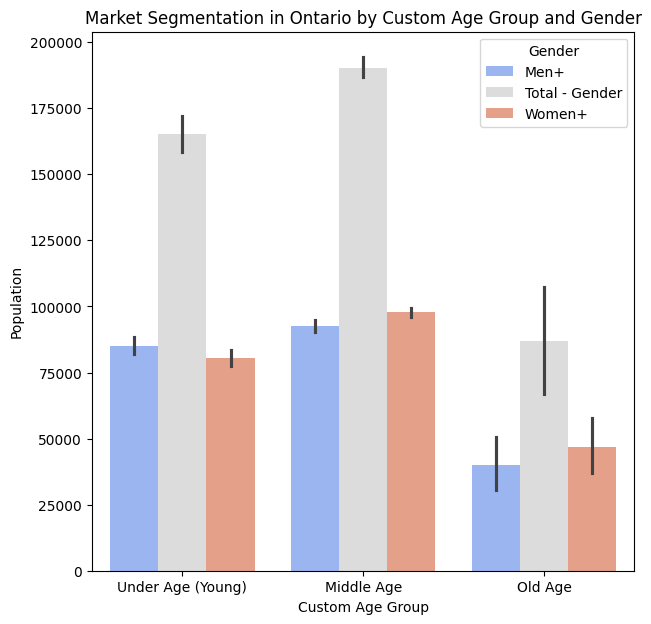

In [ ]:
# Create a pivot table to analyze the market segmentation by province, custom age group, and gender
segmentation_table = pd.pivot_table(df_grouped, values='Population', index=['Province'], columns=['Custom_Age_Group', 'Gender'], aggfunc='sum')

# Display the segmentation table
print(segmentation_table)

# Visualize segmentation for a specific province (e.g., Ontario)
province_segment = df_grouped[df_grouped['Province'] == 'Ontario']

plt.figure(figsize=(7, 7))  # Adjusted figure size for better readability
sns.barplot(x='Custom_Age_Group', y='Population', hue='Gender', data=province_segment, palette='coolwarm')
plt.title('Market Segmentation in Ontario by Custom Age Group and Gender')
plt.xlabel('Custom Age Group')
plt.ylabel('Population')
plt.legend(title='Gender')
plt.show()
